In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Summery
1. Reading files
2. Sanity check
3. EDA

In [2]:
!pwd

/opt/ml/notebooks


In [43]:
orders = pd.read_csv('../data/machine_learning_challenge_order_data.csv', parse_dates={'date':['order_date']})
labels = pd.read_csv('../data/machine_learning_challenge_labeled_data.csv')

In [44]:
#lables are imbalance
labels.is_returning_customer.value_counts()

0    189948
1     55507
Name: is_returning_customer, dtype: int64

In [45]:
orders.head()

,date,customer_id,order_hour,customer_order_rank,is_failed,voucher_amount,delivery_fee,amount_paid,restaurant_id,city_id,payment_id,platform_id,transmission_id
0,2015-06-20,000097eabfd9,19,1.0,0,0.0,0.000,11.46960,5803498,20326,1779,30231,4356
1,2016-01-29,0000e2c6d9be,20,1.0,0,0.0,0.000,9.55800,239303498,76547,1619,30359,4356
2,2017-02-26,000133bb597f,19,1.0,0,0.0,0.493,5.93658,206463498,33833,1619,30359,4324
3,2017-02-05,00018269939b,17,1.0,0,0.0,0.493,9.82350,36613498,99315,1619,30359,4356
4,2015-08-04,0001a00468a6,19,1.0,0,0.0,0.493,5.15070,225853498,16456,1619,29463,4356


In [46]:
orders.dtypes

date                   datetime64[ns]
customer_id                    object
order_hour                      int64
customer_order_rank           float64
is_failed                       int64
voucher_amount                float64
delivery_fee                  float64
amount_paid                   float64
restaurant_id                   int64
city_id                         int64
payment_id                      int64
platform_id                     int64
transmission_id                 int64
dtype: object

In [47]:
orders.describe()

,order_hour,customer_order_rank,is_failed,voucher_amount,delivery_fee,amount_paid,restaurant_id,city_id,payment_id,platform_id,transmission_id
count,786600.000000,761833.000000,786600.000000,786600.000000,786600.00000,786600.000000,7.866000e+05,786600.000000,786600.000000,786600.000000,786600.000000
mean,17.588796,9.436810,0.031486,0.091489,0.18118,10.183271,1.628641e+08,47179.750497,1668.509077,29868.529382,4253.246112
std,3.357192,17.772322,0.174628,0.479558,0.36971,5.618121,8.783082e+07,25904.630565,87.192665,1160.893265,572.855666
min,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,7.349800e+04,230.000000,1491.000000,525.000000,212.000000
25%,16.000000,1.000000,0.000000,0.000000,0.00000,6.648120,8.602350e+07,24799.000000,1619.000000,29463.000000,4228.000000
50%,18.000000,3.000000,0.000000,0.000000,0.00000,9.027000,1.696135e+08,46467.000000,1619.000000,29815.000000,4324.000000
75%,20.000000,10.000000,0.000000,0.000000,0.00000,12.213000,2.284335e+08,67886.000000,1779.000000,30231.000000,4356.000000
max,23.000000,369.000000,1.000000,93.398900,9.86000,1131.030000,3.404535e+08,100205.000000,1811.000000,30423.000000,21124.000000


Based on `describe` the only missing values are in `customer_order_rank`, which makes sense(it's better to check it, but I didn't), they rank wont get higher if `is_failed == 1` 

In [48]:
print('number of unique customers: ', len(labels.customer_id.unique()))
if len(labels) == len(labels.customer_id.unique()):  print('all unqiue')
if len(orders[~orders.customer_id.isin(labels.customer_id.unique())]) == 0 : print('all the labels are in the training')

number of unique customers:  245455
all unqiue
all the labels are in the training


## EDA

In [64]:
data = orders.merge(labels, on='customer_id')

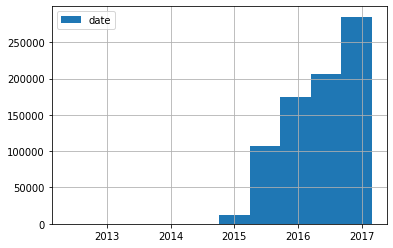

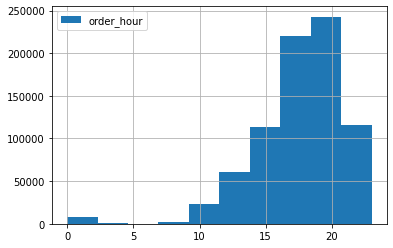

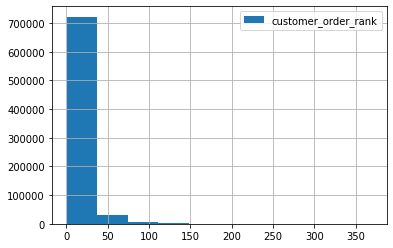

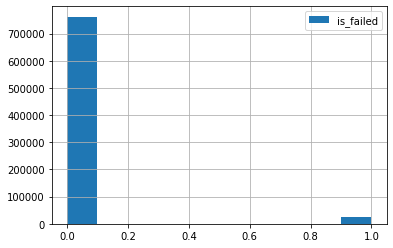

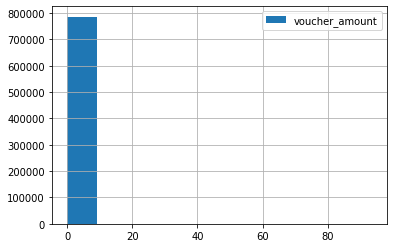

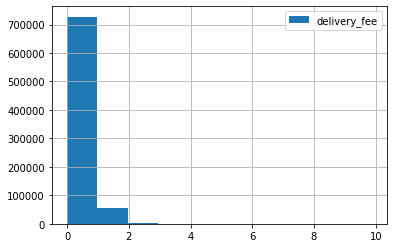

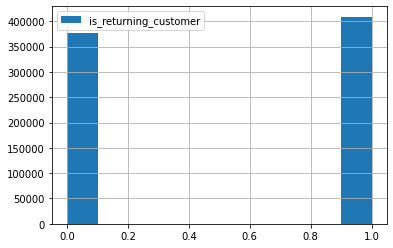

In [65]:
for col in data.columns:
    if 'id' not in col:
        data[col].hist(legend=True)
        plt.show()

### date

In [66]:
data[data.date.dt.year < 2016].date.dt.year.value_counts()

2015    209943
2014        22
2013        17
2012         4
Name: date, dtype: int64

In [67]:
data[data.date.dt.year < 2015].is_returning_customer.value_counts()

1    30
0    13
Name: is_returning_customer, dtype: int64

In [70]:
#well, it seems its really import feature!!
data['is_lt_2015'] = data.date.dt.year < 2015

### voucher_amount

<AxesSubplot:xlabel='voucher_amount'>

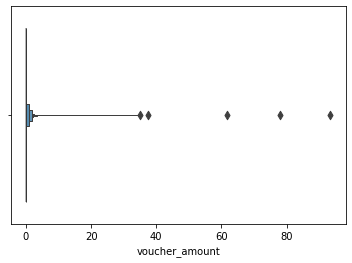

In [71]:
sns.boxenplot(data=data, x='voucher_amount')

In [72]:
data[data.voucher_amount> 20]

,date,customer_id,order_hour,customer_order_rank,is_failed,voucher_amount,delivery_fee,amount_paid,restaurant_id,city_id,payment_id,platform_id,transmission_id,is_returning_customer,is_lt_2015
47011,2016-11-24,0ec692070062,23,NaN,1,33.39791,0.00000,22.15863,216923498,85845,1779,29463,4228,1,False
83093,2016-11-24,1a75552677f3,23,NaN,1,93.39890,0.00000,61.96770,292993498,80562,1779,29463,4260,1,False
126849,2016-11-25,28ca82d58fac,0,3.0,0,23.04960,0.00000,15.29280,232253498,76362,1779,29815,4356,1,False
140454,2016-11-24,2d13ae337b18,23,5.0,0,37.57565,0.98600,24.93045,45733498,10346,1779,29463,4324,1,False
253167,2016-11-24,511c9bca0fac,23,1.0,0,29.86844,0.00000,19.81692,177133498,39051,1779,29463,4356,0,False
280376,2016-11-24,59db2c057727,23,NaN,1,78.02907,0.00000,51.77250,227643498,52293,1779,29751,4324,1,False
389087,2016-11-24,7d8942f2d1bf,23,5.0,0,26.65110,0.49300,17.68230,184603498,50898,1779,29463,4356,0,False
389088,2016-11-24,7d8942f2d1bf,23,4.0,0,21.34146,1.70085,14.16177,308723498,50898,1779,29463,4228,0,False
389560,2016-11-24,7daa45564644,23,NaN,1,24.15406,0.49300,16.02558,184343498,40441,1779,29463,4356,0,False
396129,2016-11-24,7fd16c1f1ec2,23,NaN,1,27.80358,0.00000,18.44694,226833498,10346,1779,30359,4228,0,False


In [97]:
data[data.voucher_amount>20].is_returning_customer.value_counts()

0    8
1    7
Name: is_returning_customer, dtype: int64

<AxesSubplot:xlabel='voucher_amount', ylabel='Count'>

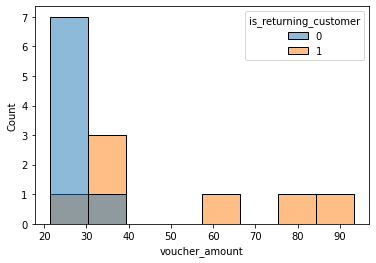

In [100]:
sns.histplot(data=data[data.voucher_amount>= 20], x='voucher_amount', hue='is_returning_customer')

<AxesSubplot:xlabel='voucher_amount', ylabel='Count'>

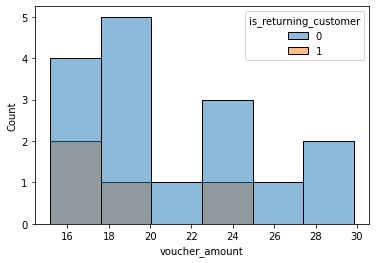

In [106]:
sns.histplot(data=data[(data.voucher_amount <= 30) & (data.voucher_amount >= 15)], x='voucher_amount', hue='is_returning_customer')

In [108]:
data[(data.voucher_amount <= 30) & (data.voucher_amount >= 15)].is_returning_customer.value_counts()

0    16
1     4
Name: is_returning_customer, dtype: int64

In [113]:
data['is_voucher_ge30'] = np.where(data.voucher_amount >= 30, 1, 0)
data['is_voucher_ge20_le30'] = np.where(((data.voucher_amount >= 15) & (data.voucher_amount <= 30)), 1, 0)


### delivery_fee

<AxesSubplot:xlabel='delivery_fee'>

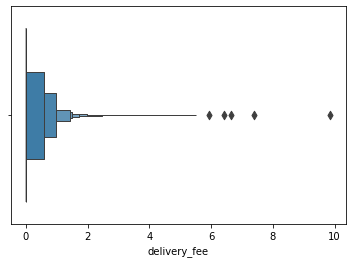

In [77]:
#delivery_fee
sns.boxenplot(data=data, x='delivery_fee')

In [116]:
## is really really rare, but it seems who are paying more than will stay
data[data.delivery_fee>= 4.5].is_returning_customer.value_counts()

0    19
1    13
Name: is_returning_customer, dtype: int64

<AxesSubplot:xlabel='delivery_fee', ylabel='Count'>

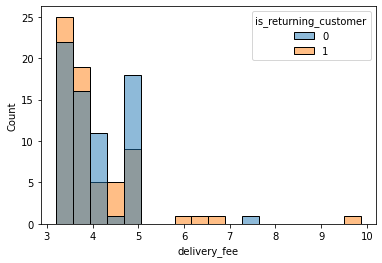

In [89]:
sns.histplot(data=data[data.delivery_fee>= 3], x='delivery_fee', hue='is_returning_customer')

In [117]:
data['is_delivery_fee_ge5'] = np.where(data.delivery_fee >= 5, 1, 0)
